In [1]:
import csv
import numpy as np
import cv2
import glob, copy, os
import xml.etree.ElementTree
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:

class Reading(object):
    """__init__() functions as the class constructor"""
    def __init__(self, xmin=None, ymin=None, xmax=None, ymax=None, typ=None, name=None):
        """self.difficult = difficult
        self.truncated = truncated"""
        self.xmin = xmin
        self.xmax = xmax
        self.ymin = ymin
        self.ymax = ymax
        self.typ = typ
        self.name = name

docs = glob.glob('BCCD\\Annotations\\' + '*.xml')      

list_reading_arr = []
with open('labels.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    label_arr = []
    counter = 0
    for row in csv_reader:
        if counter != 0 and row[2] != "":
            label_arr.append([row[1], row[2]])
        #if :
        #   label_arr.append()
        counter += 1

index = 0
for i in range(len(docs)):
    #tree = xml.etree.ElementTree.parse('//dataset-master//Annotations//BloodImage_00000.xml')
    
    #print(doc + " " + label_arr[index][1])
    if(int(label_arr[index][0]) == int(docs[i][-9:-4])):
       
        label_this = label_arr[index][1][0]
        
    
    else:
        if(int(label_arr[index-1][0]) == int(docs[i][-9:-4])):
            print('-1')
            print(docs[i][-9:-4])
            print(label_this)
            index += -1
            i+=-1
            label_this = label_arr[index][1][0]
        if(int(label_arr[index+1][0]) == int(docs[i][-9:-4])):
            print('+1')
            print(docs[i][-9:-4])
            print(label_this)
            label_this = label_arr[index+1][1][0]
            #i+=1
            index += 1
    
    if(label_this == 'B'):
        index += 1
        #i+=1
        print(docs[i])
        #docs.remove(doc)
        continue
    if(label_this == ''):
        index += 1
        #i+=1
        print(docs[i])
        #docs.remove(doc)
        continue
    """"""   
    tree = xml.etree.ElementTree.parse(docs[i])
    root = tree.getroot()
    len_data = int(len(tree.findall('.//object//'))/9)
    #list_reading = [Reading() for i in range(len_data)]
    read = Reading()
    #print(doc)
   
            #continue
    #print(doc + label_this)
    count = 0
    #print("Print out the attrib of the root:\n")
    #list_reading[index_of_reading].typ = label_this
    #list_reading[index_of_reading].name = docs[i]
    read.typ = label_this
    read.name = docs[i]
    for objs in tree.findall('.//object//'):

        index_of_reading = int(count/9)
        #if(list_reading[index_of_reading])
        """if count%9 == 2:
            list_reading[index_of_reading].truncated = int(objs.text)
        if count%9 == 3:
            list_reading[index_of_reading].difficult = int(objs.text)"""
        #print(objs.text)
        
        if count%9 == 0:
            if objs.text != "WBC":
                #print("NO WBC")
                continue
        if count%9 == 5:
            #list_reading[index_of_reading].xmin = int(objs.text)
            read.xmin = int(objs.text)
        if count%9 == 6:
            #list_reading[index_of_reading].ymin = int(objs.text)
            read.ymin = int(objs.text)
        if count%9 == 7:
            #list_reading[index_of_reading].xmax = int(objs.text)
            read.xmax = int(objs.text)
        if count%9 == 8:
            #list_reading[index_of_reading].ymax = int(objs.text)
            read.ymax = int(objs.text)
             
        
        count+=1
    
    #print(docs[i] + label_this)
    list_reading_arr.append(read)
    for j in list_reading_arr:
        if j.xmax == j.xmin or j.ymax == j.ymin:
            #print(doc)
            list_reading_arr.remove(j)
        #print("cordinates:",i.xmin,i.ymin,i.xmax,i.ymax)
    index += 1
    
    
#print(list_reading_arr[0][0].xmin)


def crop_and_resize(img, read, size):
    w, h = size
    
    img_arr =[]
    xmin, ymin, xmax, ymax = (read.xmin,read.ymin,read.xmax,read.ymax)
    #print([xmin, ymin, xmax, ymax])
    img_crop = img[ymin:ymax,xmin:xmax]
    img_resized = cv2.resize(img_crop,(w, h), interpolation = cv2.INTER_CUBIC)
    img_arr.append(img_resized)

    return img_arr

def label_generator(read):
    if(read=='N'):
        return 0
    if(read=='M'):
        return 1
    if(read=='L'):
        return 2
    if(read=='E'):
        return 3
    
    

BCCD\Annotations\BloodImage_00008.xml
+1
00097
E
BCCD\Annotations\BloodImage_00132.xml
BCCD\Annotations\BloodImage_00171.xml
+1
00281
N
+1
00330
N


In [3]:
def recenter_regularize(X):
    X_mean = np.mean(X, axis = 1)[np.newaxis]
    X_centered = X - X_mean.T
    X_norm = np.linalg.norm(X_centered, axis = 1)[np.newaxis]
    X_normalized = X_centered/X_norm.T
    return X_normalized



path = 'BCCD\\JPEGImages\\'
#images = sorted(glob.glob(path + '*.jpg'))
WBC_arr_b = []; WBC_arr_g = []; WBC_arr_r = []; WBC_arr_gray = []
label_arr = []
#read images and make each into an array
for i in range(len(list_reading_arr)):
    img = path + os.path.split(list_reading_arr[i].name)[1][:-4] + '.jpg'
    WBC_this = cv2.imread(img)
    WBC_this_arr = crop_and_resize(WBC_this, list_reading_arr[i], (60,60))
    WBC_b = WBC_this_arr[0][:, :, 0]
    WBC_g = WBC_this_arr[0][:, :, 1]
    WBC_r = WBC_this_arr[0][:, :, 2]
    WBC_gray = cv2.cvtColor(WBC_this_arr[0], cv2.COLOR_BGR2GRAY)
    

    label = label_generator(list_reading_arr[i].typ)
    #print(label)

    WBC_b, WBC_g, WBC_r, WBC_gray = np.reshape(WBC_b, -1), np.reshape(WBC_g, -1), np.reshape(WBC_r, -1), np.reshape(WBC_gray, -1)
    
    
    WBC_arr_b.append(WBC_b)
    WBC_arr_g.append(WBC_g)
    WBC_arr_r.append(WBC_r)
    WBC_arr_gray.append(WBC_gray)
    label_arr.append(label)
        
        
    i+=1
    if(i==len(list_reading_arr)):
        break
WBC_arr_b, WBC_arr_g, WBC_arr_r, WBC_arr_gray = (np.asarray(WBC_arr_b).T, np.asarray(WBC_arr_g).T, 
                                                 np.asarray(WBC_arr_r).T, np.asarray(WBC_arr_gray).T)

WBC_normalized_b, WBC_normalized_g, WBC_normalized_r, WBC_normalized_gray = (recenter_regularize(WBC_arr_b),
                                                                             recenter_regularize(WBC_arr_g),
                                                                             recenter_regularize(WBC_arr_r),
                                                                             recenter_regularize(WBC_arr_gray)) 
"""RBC_mean = np.mean(RBC_arr, axis = 1)[np.newaxis]
RBC_centered = RBC_arr - RBC_mean.T
RBC_norm = np.linalg.norm(RBC_centered, axis = 1)[np.newaxis]
RBC_normalized = RBC_centered/RBC_norm.T"""                                                                          


U, S, V = np.linalg.svd(WBC_normalized_gray)

S_total = np.linalg.norm(S)**2
S_incr = 0
k = 0
for s in S:
    S_incr += s**2
    if(S_incr >= 0.95*S_total):
        break
    k += 1
    



In [66]:
print(np.linalg.norm(WBC_normalized_gray[0]))

1.0000000000000002


In [17]:
print(os.path.split(list_reading_arr[0].name)[1][:-4] + '.jpg')

BloodImage_00000.jpg


In [43]:
print(len(S))

356


In [15]:
pca = PCA(n_components = 10)
pca.fit(WBC_normalized_gray.T)
print(pca.explained_variance_ratio_)
print(pca.components_)


[0.18821967 0.10617004 0.0812282  0.07209202 0.03738731 0.03578743
 0.03294511 0.0221237  0.02031181 0.01893678]
[[-0.00717113 -0.00683805 -0.00665761 ... -0.00592913 -0.0064643
  -0.00707737]
 [-0.01497719 -0.01621853 -0.01719615 ... -0.01387319 -0.01351391
  -0.01312893]
 [ 0.01531777  0.01505013  0.01475677 ... -0.01401118 -0.01338273
  -0.01285253]
 ...
 [ 0.0050459   0.00530059  0.00691561 ... -0.01280542 -0.01262563
  -0.01353599]
 [-0.03801314 -0.03923733 -0.03995536 ...  0.04069251  0.03847245
   0.03753221]
 [-0.00283421 -0.00082721  0.00066446 ...  0.01564833  0.01918935
   0.02022654]]


In [19]:
#Principle components
U_k = []
for i in range(k):
    U_k.append(U[:, i])
    
U_k = np.asarray(U_k)   
WBC_tilta_gray = []
for WBC in WBC_normalized_gray.T:
    WBC_tilta_gray.append(list(map(lambda x:np.inner(x, WBC), U_k.tolist())))
    



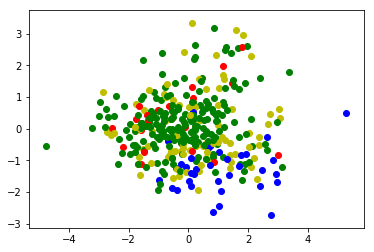

In [18]:
U_skPCA = pca.components_

U_skPCA = np.asarray(U_skPCA)
WBC_tilta_gray_sk = []

for WBC in WBC_normalized_gray.T:
    WBC_tilta_gray_sk.append(list(map(lambda x:np.inner(x, WBC), U_skPCA)))
    
fig = plt.figure()
ax = fig.add_subplot(111)
WBC_tilta_gray_sk = np.asarray(WBC_tilta_gray_sk)
counter = 0
for i in range(len(WBC_tilta_gray_sk)):
    if(label_arr[i] == 0):
        c = 'g'
    if(label_arr[i] == 1):
        c = 'r'
    if(label_arr[i] == 2):
        counter += 1
        c = 'b'
    if(label_arr[i] == 3):
        c = 'y'
        
    ax.scatter(WBC_tilta_gray_sk[i][0], WBC_tilta_gray_sk[i][1], color = c)

plt.show()

In [8]:
np.asarray(WBC_tilta_gray_sk).shape

(3600, 10)

In [20]:
U_k.shape

(110, 3600)

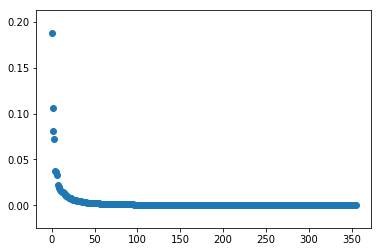

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(range(len(S)), S**2/S_total)
plt.show()

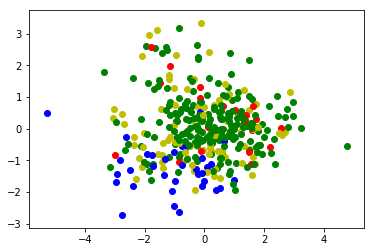

In [21]:
#RBC_tilta_list = copy.deepcopy(RBC_tilta)
WBC_tilta_gray = np.asarray(WBC_tilta_gray).T
WBC_tilta_gray_12 = WBC_tilta_gray[:2]



fig = plt.figure()
ax = fig.add_subplot(111)
WBC_tilta_gray_12 = WBC_tilta_gray_12.T
counter = 0
for i in range(len(WBC_tilta_gray_12)):
    if(label_arr[i] == 0):
        c = 'g'
    if(label_arr[i] == 1):
        c = 'r'
    if(label_arr[i] == 2):
        counter += 1
        c = 'b'
    if(label_arr[i] == 3):
        c = 'y'
        
    ax.scatter(WBC_tilta_gray_12[i][0], WBC_tilta_gray_12[i][1], color = c)

plt.show()


In [60]:

# KNN classifier
def KNN_classif(Feature, img_Rep, trainLabels, k):
    training_labels = np.asarray(trainLabels)
    #compute the distance of the input N-dim Feature to every other point
    #
    distance=[]
    for img in img_Rep.T:
        distance.append(np.linalg.norm(img - Feature))
    
    distance = np.array(distance)
    distance_k = distance.argsort()[:k]
    neighbors = training_labels[distance_k].tolist()
    #print(neighbors)
    #x = np.sum(training_labels[distance_k])
    #return x
    
    return max(neighbors, key=neighbors.count)

# k-fold Cross Validation 
cross_validation(samples, labels, k:int):
    m,n = np.shape(samples)
    k_fold = np.row_stack((samples, labels))
    


WBC_tilta_gray_train = WBC_tilta_gray[:300, :].T
WBC_tilta_gray_test = WBC_tilta_gray[300:, :].T
cls = []

#for k in range()
for i in range(len(WBC_tilta_gray_test[0])):
    
    cls.append(KNN_classif(WBC_tilta_gray_test[:, i], WBC_tilta_gray_train , label_arr, 19))

cls = np.asarray(cls)
print(cls-np.asarray(label_arr[300:]))
#print(np.sum(cls - np.asarray(label_arr[3000:])))
RBC_tilta = np.asarray(RBC_tilta_list).T





[ 1  0  0  0  0 -3 -3  0  0 -2  0 -3  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -3  0  0  0  0  0 -3  0  0  0 -3  0  0  0  0  0  0  3  0  0  0  0
  0  0  0  0  3  0  0 -3]


In [54]:
WBC_tilta_gray.shape

(356, 110)

In [124]:
print(np.sum(abs(cls - np.asarray(label_arr[3000:]))))

239


In [125]:
print(cls)
print(label_arr[3000])
print([0 for i in range(5)])

[1 2 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 2 2 2 1 1 2 1 1
 2 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1
 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 2 1 1 1
 2 2 1 1 1 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2
 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 2 2 1 1
 2 1 1 1 1 1 1 1 1 2 1 2 1 1 2 2 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 2
 2 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 2 1 1 1 1 1 1 1 2 

In [97]:
print(RBC_tilta.shape)
print(RBC_normalized.shape)

(3852, 112)
(4800, 3852)


ValueError: shapes (2,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)

In [69]:
print(RBC_normalized.shape)
np.argmax(label_arr)
label_arr[2]

(3852, 4800)


2

In [31]:
RBC_norm = np.linalg.norm(RBC_centered, axis = 1)[np.newaxis]
RBC_normalized = RBC_centered/RBC_norm.T

ValueError: operands could not be broadcast together with shapes (366,921600) (1,366) 

In [26]:
len(RBC_arr)
A = [[[1,2,3],[2,3,2],[3,4,3]],[[11,12,13],[12,13,12],[13,14,13]]]
A_vec = np.reshape(A, -1)  
B_vec = np.flip(A_vec)
A_centered = np.mean(np.asarray([A_vec, B_vec]), axis = 0)
print(A_centered)

[7. 8. 8. 7. 8. 7. 8. 8. 7. 7. 8. 8. 7. 8. 7. 8. 8. 7.]


In [12]:
print(RBC_arr[0])

[[[143 154 176]
  [143 154 176]
  [145 153 176]
  ...
  [203 197 190]
  [201 195 188]
  [199 193 186]]

 [[143 154 176]
  [143 154 176]
  [145 153 176]
  ...
  [203 197 190]
  [201 195 188]
  [199 193 186]]

 [[141 155 174]
  [141 155 174]
  [143 154 174]
  ...
  [201 198 190]
  [199 196 188]
  [197 194 186]]

 ...

 [[206 205 207]
  [201 203 204]
  [197 198 202]
  ...
  [185 124 162]
  [191 125 166]
  [197 131 172]]

 [[209 206 208]
  [204 203 205]
  [198 197 201]
  ...
  [184 121 161]
  [191 123 164]
  [196 128 169]]

 [[210 207 209]
  [206 203 205]
  [197 196 200]
  ...
  [183 120 160]
  [190 122 163]
  [197 127 168]]]


In [23]:
img = RBC_arr[0]

def crop_and_resize(img, bound, size):
    
    xmin, ymin, xmax, ymax = bound
    w, h = size
    
    img_crop = img[ymin:ymax,xmin:xmax]
    #cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
    img_resized = cv2.resize(img_crop,(w, h), interpolation = cv2.INTER_CUBIC)
    return img_resized
    
img_resized = crop_and_resize(img, (100, 50, 250, 200), (100, 100))
cv2.imshow('img', img_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()